In [1]:
import pandas as pd

In [14]:
df=pd.read_csv("/content/store.csv")

In [15]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


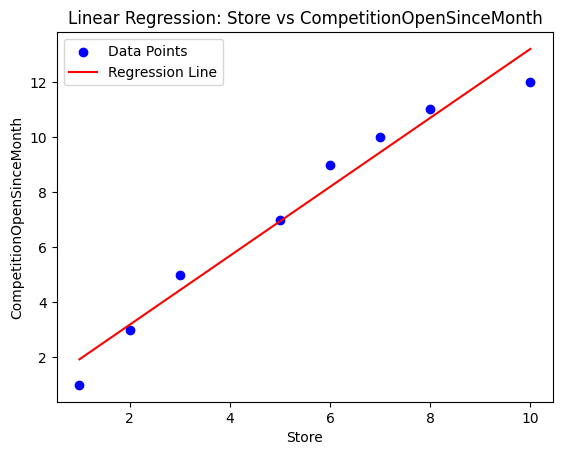

Linear Regression Equation: CompetitionOpenSinceMonth = 1.2518518518518518 * Store + 0.677777777777778


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'Store' and 'CompetitionOpenSinceMonth' are columns in your DataFrame 'df'
# If df is not defined yet, you can create a sample DataFrame (replace this with your actual data)
data = {
    'Store': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'CompetitionOpenSinceMonth': [1, 3, 5, np.nan, 7, 9, 10, 11, np.nan, 12]
}

df = pd.DataFrame(data)

# Check if the column 'CompetitionOpenSinceMonth' exists
if 'CompetitionOpenSinceMonth' not in df.columns:
    raise KeyError("'CompetitionOpenSinceMonth' column not found in DataFrame")

# Handle NaN values by dropping rows where 'CompetitionOpenSinceMonth' is NaN
df = df.dropna(subset=['CompetitionOpenSinceMonth'])

# Alternatively, you can fill NaN values with a specific value (e.g., mean or median)
# df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mean(), inplace=True)

X = df['Store'].values.reshape(-1, 1)  # Reshape to a 2D array
y = df['CompetitionOpenSinceMonth'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Store')
plt.ylabel('CompetitionOpenSinceMonth')
plt.title('Linear Regression: Store vs CompetitionOpenSinceMonth')
plt.legend()
plt.show()

# Print the linear regression equation
print(f"Linear Regression Equation: CompetitionOpenSinceMonth = {model.coef_[0]} * Store + {model.intercept_}")
